In [1]:
# IMPORT REQUIRED MODULES
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
# Define the OMG AXCTD directory
AXCTD_folder_path = 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ilulissat_icefjord_AXCTD'

# Get a list of CSV files in the folder and sort them based on the date in the filename
csv_files = [file_name for file_name in os.listdir(AXCTD_folder_path) if file_name.endswith('.csv')]
csv_files.sort(key=lambda x: x.split('_')[4])  

# Define the colours for each AXCTD profile 
colors = ['#03045e', '#0077b6', '#38b000', '#ff7900']

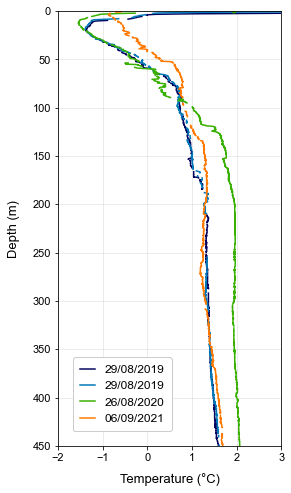

In [4]:
# Plot a temperature - depth profile showing each AXCTD profile
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(4, 8))
plt.grid(axis = 'x', alpha=0.3, zorder=0)
plt.grid(axis = 'y', alpha=0.3, zorder=0)

for file_name, color in zip(csv_files, colors):
    if file_name.endswith('.csv'): 
        date_str = file_name.split('_')[4]
        year = date_str[:4]
        month = date_str[4:6]
        day = date_str[6:8]
        formatted_date = f"{day}/{month}/{year}"
        df = pd.read_csv(os.path.join(AXCTD_folder_path, file_name))
        plt.plot(df['temperature'], df['depth'], label=formatted_date, color=color)

plt.xlabel('Temperature (°C)', labelpad=10, fontsize=13)
plt.ylabel('Depth (m)', labelpad=13, fontsize=13)
plt.ylim(0, 450)
plt.xlim(-2, 3)
plt.tick_params(axis='y', labelsize=11)
plt.tick_params(axis='x', labelsize=11)
plt.gca().invert_yaxis()
plt.legend(loc='lower left', frameon=True, framealpha=1, fontsize=12, facecolor='white', fancybox=True, bbox_to_anchor=(0.04, 0.02), handlelength=1.25, borderpad=0.6)
plt.show()